In [2]:
import os
import pandas as pd

# Define the dataset directory
data_dir = '/Users/lucky/GitHub/DDoS-Hybrid-Detection-System/datasets/cic_ids_2019'

# Initialize an empty list to store dataframes
dataframes = []

# Flag to indicate if the header should be included
include_header = True

# Walk through the directory and load each CSV file into a dataframe
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            try:
                if include_header:
                    # Read the CSV with the header
                    df = pd.read_csv(file_path)
                    include_header = False  # Don't include the header for the next files
                else:
                    # Read the CSV without the header
                    df = pd.read_csv(file_path, header=None, skiprows=1)
                    df.columns = dataframes[0].columns  # Ensure columns match the first dataframe
                dataframes.append(df)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_63497/3544787738.py:21: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_63497/3544787738.py:25: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_63497/3544787738.py:25: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_63497/3544787738.py:25: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_63497/3544

In [22]:
# Display basic information about the combined dataframe
print(combined_df.info())
print(combined_df.head())

# Save the combined dataframe to a new CSV file if needed
combined_df.to_csv('/Users/lucky/GitHub/DDoS-Hybrid-Detection-System/datasets/combined_cic_ids_2019.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70427637 entries, 0 to 70427636
Data columns (total 88 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Flow ID                       object 
 2    Source IP                    object 
 3    Source Port                  int64  
 4    Destination IP               object 
 5    Destination Port             int64  
 6    Protocol                     int64  
 7    Timestamp                    object 
 8    Flow Duration                int64  
 9    Total Fwd Packets            int64  
 10   Total Backward Packets       int64  
 11  Total Length of Fwd Packets   float64
 12   Total Length of Bwd Packets  float64
 13   Fwd Packet Length Max        float64
 14   Fwd Packet Length Min        float64
 15   Fwd Packet Length Mean       float64
 16   Fwd Packet Length Std        float64
 17  Bwd Packet Length Max         float64
 18   Bwd Packet Length M

['DrDoS_NTP' 'BENIGN' 'Syn' 'DrDoS_DNS' 'TFTP' 'UDP-lag' 'WebDDoS'
 'DrDoS_SSDP' 'DrDoS_NetBIOS' 'DrDoS_MSSQL' 'DrDoS_UDP' 'DrDoS_LDAP'
 'DrDoS_SNMP' 'LDAP' 'MSSQL' 'UDP' 'UDPLag' 'NetBIOS' 'Portmap']


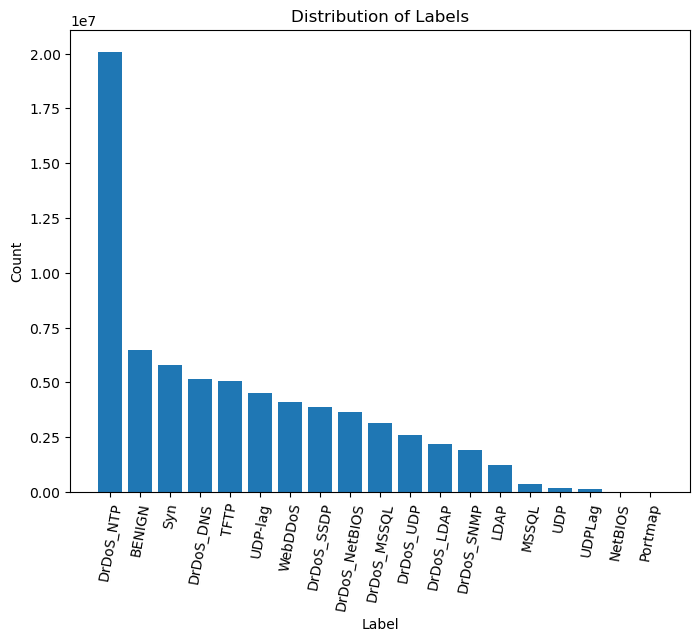

In [21]:
import matplotlib.pyplot as plt

# Get value counts and sort index to maintain order
label_counts = combined_df[' Label'].value_counts()

# Plot the distribution of labels
plt.figure(figsize=(12, 8))
plt.title('Distribution of Labels for 03-11 Day')
plt.xlabel('Label')
plt.ylabel('Count')
plt.bar(label_counts.index, label_counts.values)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# Label Counts for Each Label - Original
label_counts = combined_df[' Label'].value_counts()
print(label_counts)

 Label
TFTP             20082580
Syn               6473789
MSSQL             5787453
DrDoS_SNMP        5159870
DrDoS_DNS         5071011
DrDoS_MSSQL       4522492
DrDoS_NetBIOS     4093279
UDP               3867155
NetBIOS           3657497
DrDoS_UDP         3134645
DrDoS_SSDP        2610611
DrDoS_LDAP        2179930
LDAP              1915122
DrDoS_NTP         1202642
UDP-lag            366461
Portmap            186960
BENIGN             113828
UDPLag               1873
WebDDoS               439
Name: count, dtype: int64


In [24]:
# Removal of Duplicate Rows
combined_df.drop_duplicates(inplace=True)
label_counts_no_duplicates = combined_df[' Label'].value_counts()

 Label
TFTP             20082580
Syn               6007892
MSSQL             5787453
DrDoS_SNMP        5159870
DrDoS_DNS         5071011
DrDoS_MSSQL       4522492
DrDoS_NetBIOS     4093279
UDP               3867155
NetBIOS           3657497
DrDoS_UDP         3134645
DrDoS_SSDP        2610611
DrDoS_LDAP        2179930
LDAP              1915122
DrDoS_NTP         1202642
UDP-lag            366461
Portmap            186960
BENIGN             109424
UDPLag               1873
WebDDoS               439
Name: count, dtype: int64
['DrDoS_NTP' 'BENIGN' 'Syn' 'DrDoS_DNS' 'TFTP' 'UDP-lag' 'WebDDoS'
 'DrDoS_SSDP' 'DrDoS_NetBIOS' 'DrDoS_MSSQL' 'DrDoS_UDP' 'DrDoS_LDAP'
 'DrDoS_SNMP' 'LDAP' 'MSSQL' 'UDP' 'UDPLag' 'NetBIOS' 'Portmap']


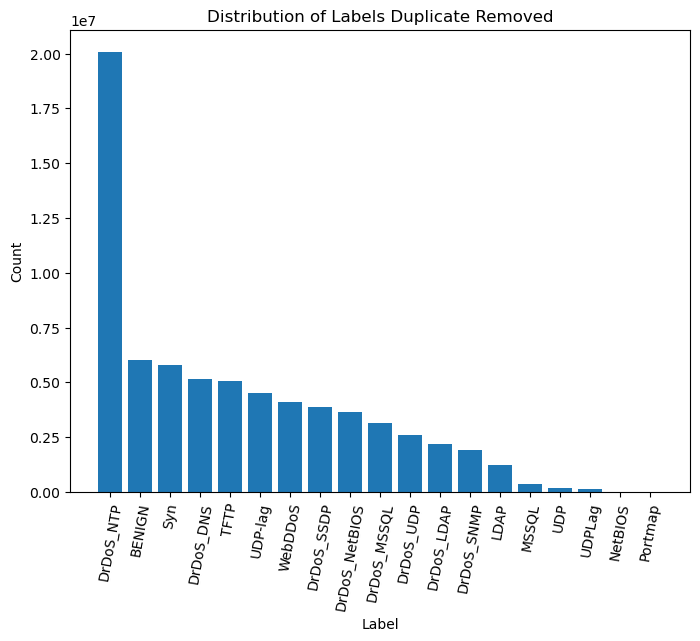

In [25]:
print(label_counts_no_duplicates)

# Plot the distribution of the 'Label' column
plt.figure(figsize=(8, 6))
plt.title('Distribution of Labels Duplicate Removed')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.bar(label_counts_no_duplicates.index, label_counts_no_duplicates.values)

print(combined_df[' Label'].unique())

In [57]:
# Analyze 1 Day of Data
import os
import pandas as pd

# Define the dataset directory
data_dir = '/Users/lucky/GitHub/DDoS-Hybrid-Detection-System/datasets/cic_ids_2019/03-11'

# Initialize an empty list to store dataframes
dataframes = []

# Flag to indicate if the header should be included
include_header = True

# Walk through the directory and load each CSV file into a dataframe
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            try:
                if include_header:
                    # Read the CSV with the header
                    df = pd.read_csv(file_path)
                    include_header = False  # Don't include the header for the next files
                else:
                    # Read the CSV without the header
                    df = pd.read_csv(file_path, header=None, skiprows=1)
                    df.columns = dataframes[0].columns  # Ensure columns match the first dataframe
                dataframes.append(df)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_17660/4277450067.py:22: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_17660/4277450067.py:26: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_17660/4277450067.py:26: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_17660/4277450067.py:26: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_17660/4277

In [58]:
# Show Label Counts for Each Label
label_counts = combined_df[' Label'].value_counts()
print(label_counts)

 Label
MSSQL      5787453
Syn        4891500
UDP        3867155
NetBIOS    3657497
LDAP       1915122
Portmap     186960
BENIGN       56965
UDPLag        1873
Name: count, dtype: int64


In [59]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20364525 entries, 0 to 20364524
Data columns (total 88 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Flow ID                       object 
 2    Source IP                    object 
 3    Source Port                  int64  
 4    Destination IP               object 
 5    Destination Port             int64  
 6    Protocol                     int64  
 7    Timestamp                    object 
 8    Flow Duration                int64  
 9    Total Fwd Packets            int64  
 10   Total Backward Packets       int64  
 11  Total Length of Fwd Packets   float64
 12   Total Length of Bwd Packets  float64
 13   Fwd Packet Length Max        float64
 14   Fwd Packet Length Min        float64
 15   Fwd Packet Length Mean       float64
 16   Fwd Packet Length Std        float64
 17  Bwd Packet Length Max         float64
 18   Bwd Packet Length M

<BarContainer object of 8 artists>

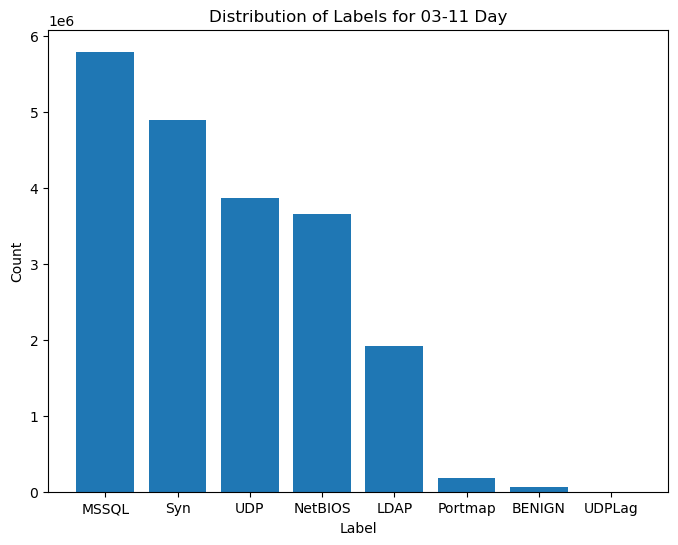

In [60]:
# Show the data distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title("Distribution of Labels for 03-11 Day")
plt.xlabel("Label")
plt.ylabel("Count")
plt.bar(label_counts.index, label_counts.values)

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

def prepare_norm_balanced_data(df, top_features=[], random_state=42, columns_to_remove=[], test_size=0.25, remove_duplicates=True, modify_inplace=True):
    """ Prepares the data for training and testing.

    Args:
        df: pandas DataFrame.
        top_features: List of top features to select.
        random_state: int, default=42.
        test_size: float, default=0.25.
        remove_duplicates: bool, default=True.
        modify_inplace: bool, default=False. If True, modifies the DataFrame in-place.

    Returns:
        x_train_scaled: pandas DataFrame (scaled training data).
        x_test_scaled: pandas DataFrame (scaled testing data).
        y_train: pandas Series (training labels).
        y_test: pandas Series (testing labels).
        label_mapping: dict (label encoding mapping).
    """

    if not modify_inplace:
        df = df.copy()

    # Data Cleaning
    if remove_duplicates:
        df.drop_duplicates(keep='first', inplace=True)

    df.dropna(subset=[' Label'], inplace=True) 
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # Columns to Remove 
    if len(columns_to_remove) > 0:
        df.drop(columns=columns_to_remove, inplace=True)

    # Label Encoding
    if df[' Label'].dtype == 'object':
        label_encoder = LabelEncoder()
        df[' Label'] = label_encoder.fit_transform(df[' Label'])
        label_mapping = {idx: label for idx, label in enumerate(label_encoder.classes_)}
    else:
        label_mapping = None

    # Feature Selection and Data Split
    if len(top_features) > 0:
        X = df[top_features]
    else:
        X = df.drop(columns=[' Label'])
    y = df[' Label']

    # Normalization and Split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Apply SMOTE to balance the training data
    smote = SMOTE(random_state=random_state)
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

    return pd.DataFrame(x_train_resampled, columns=x_train.columns), \
           pd.DataFrame(x_test_scaled, columns=x_test.columns), \
           y_train_resampled, y_test, label_mapping

In [63]:
columns_to_remove = [
    'Unnamed: 0', 'Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'SimillarHTTP'
]

x_train,x_test, y_train, y_test, label_map = prepare_norm_balanced_data(
    combined_df, 
    random_state=42, 
    columns_to_remove=columns_to_remove, 
    test_size=0.3, 
    remove_duplicates=True, 
    modify_inplace=True
)

In [ ]:
from collections import Counter

print(label_map)
print(Counter(y_train))


[0]	validation_0-mlogloss:1.05250	validation_1-mlogloss:1.05266
[1]	validation_0-mlogloss:0.72728	validation_1-mlogloss:0.72748
[2]	validation_0-mlogloss:0.52835	validation_1-mlogloss:0.52858
[3]	validation_0-mlogloss:0.39480	validation_1-mlogloss:0.39506
[4]	validation_0-mlogloss:0.30150	validation_1-mlogloss:0.30179
[5]	validation_0-mlogloss:0.23495	validation_1-mlogloss:0.23525
[6]	validation_0-mlogloss:0.18688	validation_1-mlogloss:0.18720
[7]	validation_0-mlogloss:0.15190	validation_1-mlogloss:0.15224
[8]	validation_0-mlogloss:0.12635	validation_1-mlogloss:0.12670
[9]	validation_0-mlogloss:0.10742	validation_1-mlogloss:0.10778
[10]	validation_0-mlogloss:0.09299	validation_1-mlogloss:0.09336
[11]	validation_0-mlogloss:0.08239	validation_1-mlogloss:0.08277
[12]	validation_0-mlogloss:0.07426	validation_1-mlogloss:0.07465
[13]	validation_0-mlogloss:0.06772	validation_1-mlogloss:0.06815
[14]	validation_0-mlogloss:0.06317	validation_1-mlogloss:0.06360
[15]	validation_0-mlogloss:0.05975	

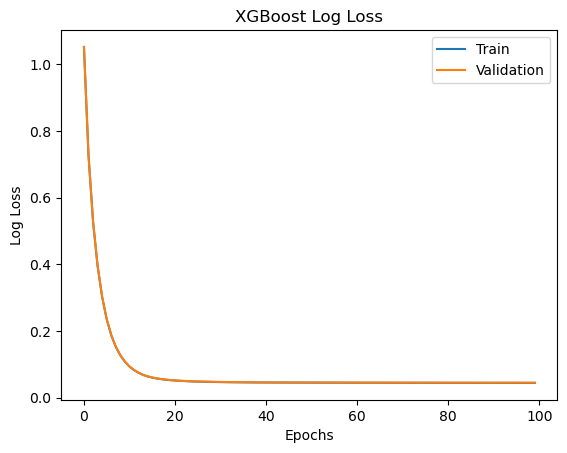

In [56]:
import xgboost as xgb
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split your training data into training and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define your XGBoost classifier with the eval_metric in the constructor
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model with evaluation sets to track metrics
eval_set = [(x_train_split, y_train_split), (x_val_split, y_val_split)]
xgb_model.fit(x_train_split, y_train_split, eval_set=eval_set, verbose=True)

# Predict on the test set
y_pred = xgb_model.predict(x_test)

# Evaluate the classifier
report = classification_report(y_test, y_pred)
print(report)

# Plot the loss curve
results = xgb_model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


In [54]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Assuming x_train, x_test, y_train, y_test have been prepared and xgb_model is trained

# Function to preprocess a single row
def preprocess_row(row, scaler, columns_to_remove):
    row = row.drop(columns=columns_to_remove, errors='ignore')
    row = row.values.reshape(1, -1)  # Reshape for a single sample
    row = scaler.transform(row)  # Normalize
    return row

# Assume combined_df is your original dataframe before splitting and training
# Select a specific row (e.g., row with index 10)
specific_row = combined_df.iloc[10]
print(specific_row)

# Columns to remove
columns_to_remove = ['Unnamed: 0', 'Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'SimillarHTTP']

# Preprocess the specific row
scaler = StandardScaler()
scaler.fit(combined_df.drop(columns=[' Label'] + columns_to_remove, errors='ignore'))  # Fit the scaler on the whole dataset
preprocessed_row = preprocess_row(specific_row.drop(' Label'), scaler, columns_to_remove)

# Predict using the model
predicted_label = xgb_model.predict(preprocessed_row)
predicted_proba = xgb_model.predict_proba(preprocessed_row)

# Decode the label if necessary (reverse of LabelEncoder)
label_encoder = LabelEncoder()
label_encoder.fit(combined_df[' Label'])
decoded_label = label_encoder.inverse_transform(predicted_label)

# Print the results
print(f"Predicted Label: {predicted_label[0]} (Decoded: {decoded_label[0]})")
print(f"Prediction Probabilities: {predicted_proba}")


Source Port          33836.0
Destination Port     58075.0
Protocol                 6.0
Flow Duration           52.0
Total Fwd Packets        2.0
                      ...   
Idle Std                 0.0
Idle Max                 0.0
Idle Min                 0.0
Inbound                  1.0
Label                    5.0
Name: 12, Length: 82, dtype: float64


/Users/lucky/anaconda3/envs/watchtower-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Label: 5 (Decoded: 5)
Prediction Probabilities: [[4.5541726e-02 1.1090779e-03 6.5579772e-02 6.3807715e-04 8.1640971e-04
  8.8015991e-01 5.9691062e-03 1.8595278e-04]]


In [42]:
print(combined_df.info())
print(label_map)

<class 'pandas.core.frame.DataFrame'>
Index: 18998085 entries, 0 to 20364524
Data columns (total 82 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Source Port                  int64  
 1    Destination Port             int64  
 2    Protocol                     int64  
 3    Flow Duration                int64  
 4    Total Fwd Packets            int64  
 5    Total Backward Packets       int64  
 6   Total Length of Fwd Packets   float64
 7    Total Length of Bwd Packets  float64
 8    Fwd Packet Length Max        float64
 9    Fwd Packet Length Min        float64
 10   Fwd Packet Length Mean       float64
 11   Fwd Packet Length Std        float64
 12  Bwd Packet Length Max         float64
 13   Bwd Packet Length Min        float64
 14   Bwd Packet Length Mean       float64
 15   Bwd Packet Length Std        float64
 16  Flow Bytes/s                  float64
 17   Flow Packets/s               float64
 18   Flow IAT Mean           